In [3]:
# Veriler temizlenerek analiz için hazır hale getirilir. Veriler hemen hemen her zaman temizlenmeye ihtiyaç duyar
# Verilerin temizlenmesi gereken bazı durumlar şu şekildedir:
# 1) Sütun isimleri tutarsız olabilir, büyük/küçük harf sıkıntısı ve ya kötü karakterler bulunabilir
# 2) Kayıp veriler tanımlanmalı ve bulunmalıdır
# 3) Outlier değerler bulunarak incelenmelidir
# 4) Satırlardaki tekrarlanmalar bulunmalı ve düşürülmelidir. Çünkü analizi etkileyebilirler(bias)
# 5) Kayıp değeler nedeniyle aslında nümerik olması gereken sütunların veri tipi string olabilir

In [4]:
# head ve tail metodları ile dataframe in ilk ve son 5 satırlarına bakabiliriz
# info metodu ile dataframe hakkında ilave bilgi alabiliriz

In [5]:
# Kullanacağımız veri kümesi: Department of Buildings Job Application Filings

In [6]:
import pandas as pd

df = pd.read_csv('https://data.cityofnewyork.us/resource/rvhx-8trz.csv', nrows=200)
print(df.head())
print(df.tail())

  adult_estab  applicant_license__ applicant_professional_title  \
0           N                23981                           RA   
1           N                69956                           PE   
2           N                22400                           RA   
3           N                40357                           RA   
4           N                86301                           PE   

  applicant_s_first_name applicant_s_last_name    approved    assigned  \
0                  FRANK               PETRUSO  05/21/2003  03/12/2003   
1                  Brian                 Flynn  05/11/2007         NaN   
2                   Alan             Weinstein  03/28/2003  03/28/2003   
3                  PRITI                  LUND         NaN  02/28/2019   
4               XIAOHONG                  ZHAO  04/16/2003  03/26/2003   

     bin__  block boiler      ...      street_frontage      street_name  \
0  4128968   5751    NaN      ...                    0        20 AVENUE   
1 

In [7]:
# Çok fazla veri olduğundan head ve tail yeterince aydınlatıcı değil
# Ayrıca sütun isimlerine bakarak analizimiz için hangi sütunların gerekli olduğuna karar verebiliriz

In [8]:
print(df.columns)

Index(['adult_estab', 'applicant_license__', 'applicant_professional_title',
       'applicant_s_first_name', 'applicant_s_last_name', 'approved',
       'assigned', 'bin__', 'block', 'boiler', 'borough', 'building_class',
       'building_type', 'city_', 'city_owned', 'cluster', 'community___board',
       'curb_cut', 'dobrundate', 'doc__', 'efiling_filed',
       'enlargement_sq_footage', 'equipment', 'existing_dwelling_units',
       'existing_height', 'existing_occupancy', 'existing_zoning_sqft',
       'existingno_of_stories', 'fee_status', 'fire_alarm', 'fire_suppression',
       'fuel_burning', 'fuel_storage', 'fully_paid', 'fully_permitted',
       'gis_bin', 'gis_census_tract', 'gis_council_district', 'gis_latitude',
       'gis_longitude', 'gis_nta_name', 'horizontal_enlrgmt', 'house__',
       'initial_cost', 'job__', 'job_description', 'job_no_good_count',
       'job_s1_no', 'job_status', 'job_status_descrp', 'job_type',
       'landmarked', 'latest_action_date', 'little_e

In [9]:
# Dataframe in shape attributune bakarak kaç tane satır ve sütun olduğunu anlayabiliriz
# Ayrıca satır sayılarını ve info metodunu kullanarak kaç tane null değer olduğunu anlayabiliriz

In [10]:
print(df.shape)
print(df.info())

(200, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 96 columns):
adult_estab                      185 non-null object
applicant_license__              200 non-null int64
applicant_professional_title     200 non-null object
applicant_s_first_name           200 non-null object
applicant_s_last_name            200 non-null object
approved                         176 non-null object
assigned                         163 non-null object
bin__                            200 non-null int64
block                            200 non-null int64
boiler                           6 non-null object
borough                          200 non-null object
building_class                   197 non-null object
building_type                    200 non-null object
city_                            200 non-null object
city_owned                       26 non-null object
cluster                          157 non-null object
community___board                200 non-nu

In [11]:
# EDA yaparken her bir sütundaki unique değer sayısını görmek isteyebiliriz. Bunun için ilgili sütun üzerinde
# value_counts metodunu kullanıyoruz. Sütunu nasıl seçtiğimizin bir önemi yok. Ayrıca sütun başka bir veri tipinde
# olsa bile sonuç int oluyor. 

In [12]:
df.approved.value_counts(dropna=False)

NaN           24
04/22/2005     4
03/28/2014     3
11/10/2011     3
08/15/2013     3
07/26/2011     2
06/21/2013     2
02/27/2019     2
06/16/2003     2
09/14/2012     2
06/11/2015     2
05/07/2015     2
06/25/2015     2
04/03/2013     1
09/17/2018     1
12/08/2015     1
01/27/2010     1
06/29/2012     1
06/05/2003     1
11/27/2013     1
08/17/2011     1
12/01/2014     1
12/10/2010     1
03/25/2013     1
03/06/2013     1
05/20/2003     1
04/29/2008     1
05/28/2003     1
08/09/2006     1
06/11/2012     1
              ..
04/15/2003     1
10/03/2008     1
04/19/2010     1
07/19/2013     1
08/07/2003     1
02/23/2017     1
08/30/2016     1
12/02/2010     1
01/19/2011     1
01/17/2014     1
06/04/2013     1
08/20/2014     1
08/27/2015     1
03/16/2015     1
04/22/2015     1
01/28/2011     1
04/24/2003     1
05/19/2003     1
05/21/2003     1
03/11/2013     1
10/29/2014     1
06/28/2013     1
07/12/2013     1
07/25/2014     1
12/03/2008     1
10/03/2014     1
04/17/2015     1
09/06/2013    

In [13]:
# Nümerik sütunlar üzerinde istatistik uygulayarak outlier değerleri bulabiliriz
# Bunun için basitçe dataframe üzerinde describe metodunu kullanabiliriz
# Outlier değerlerin hepsi hata olacak diye bir şey yoktur doğru değerler de olabilir
# 25, 50 ve 75 yüzde olarak denk gelen değerleri veriyor. Yani 50 medyanı verir

In [14]:
df.describe()

,applicant_license__,bin__,block,community___board,doc__,enlargement_sq_footage,existing_dwelling_units,existing_height,existing_zoning_sqft,existingno_of_stories,...,owner_sphone__,proposed_dwelling_units,proposed_height,proposed_no_of_stories,proposed_zoning_sqft,street_frontage,total_construction_floor_area,withdrawal_flag,zip,zoning_dist3
count,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,87.000000,200.000000,200.00000,200.000000,...,1.990000e+02,118.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,0.0
mean,48290.430000,2.664537e+06,3487.200000,257.640000,1.090000,2417.735000,55.517241,65.560000,3052.18000,5.590000,...,5.348877e+09,48.872881,75.670000,6.640000,12502.220000,11.215000,8737.265000,0.040000,1.074354e+06,NaN
std,49989.954899,1.389060e+06,3690.553573,128.092893,0.390722,22435.841099,142.950460,111.794573,21676.99838,8.873873,...,2.771269e+09,125.977854,107.029659,8.596505,66018.754552,48.614666,37567.032772,0.220552,1.061676e+07,NaN
min,8500.000000,1.002028e+06,1.000000,101.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,2.012886e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.109000e+03,NaN
25%,22355.750000,1.076698e+06,850.500000,107.750000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,2.127715e+09,2.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.002200e+04,NaN
50%,32658.000000,3.044130e+06,1770.500000,303.000000,1.000000,0.000000,2.000000,29.000000,0.00000,2.000000,...,7.038493e+09,3.000000,40.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.110100e+04,NaN
75%,70795.750000,4.076497e+06,5617.000000,402.250000,1.000000,0.000000,40.000000,65.000000,0.00000,6.000000,...,7.186592e+09,38.500000,75.000000,7.250000,0.000000,0.000000,0.000000,0.000000,1.135700e+04,NaN
max,642847.000000,5.056960e+06,16313.000000,502.000000,4.000000,257226.000000,974.000000,905.000000,229224.00000,50.000000,...,9.733975e+09,974.000000,905.000000,50.000000,772494.000000,405.000000,290195.000000,2.000000,1.123469e+08,NaN


In [15]:
# EDA yaparken kullanılan önemli bir teknik görselleştirmedir
# Örneğin verilerin bar plot ve histogramlarına bakabiliriz böylece frekansları görürüz
# Bar plot ayrık veriler için, histogram ise sürekli veriler için kullanılır

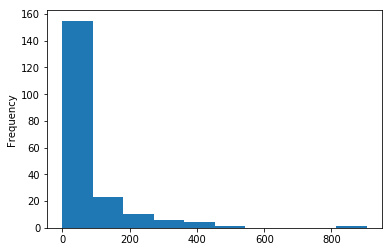

In [18]:
df['proposed_height'].plot('hist')

In [19]:
# Boxplot outlierları görmemizi sağlar
# Ayrıca nümerik bir değeri kategorilere göre değerlendirmemizi sağlar
# Kategorileri içeren sütunu by parametresi ile veriyoruz fakat veri kümesinde uygun sütun yok

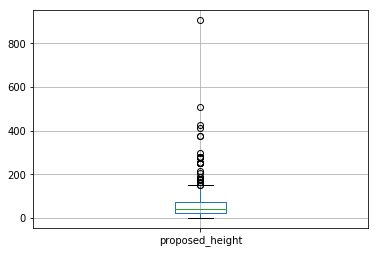

In [20]:
df.boxplot(column='proposed_height')

In [21]:
# İki değişken arasındaki ilişkiyi scatter plot ile görebiliriz
# Bazı hatalı durumlar scatter plot ile ayırt edilir
# Mesela hem düşük okur-yazarlık hem de düşük doğum oranlarına sahip bir ülke gibi